In [1]:
# Imports
import numpy as np
from radiotools import plthelpers as php
from matplotlib import pyplot as plt
import os
import time
import pickle
from scipy import stats
from radiotools import helper as hp
from NuRadioReco.utilities import units
from toolbox import load_file, calculate_percentage_interval, get_pred_energy_diff_data, models_dir, get_histogram2d, load_file_all_properties, get_2dhist_normalized_columns
import argparse
from termcolor import colored
from constants import datapath, data_filename, label_filename, plots_dir, test_file_ids
from scipy.optimize import curve_fit

import torch
# -------

# # Parse arguments
# parser = argparse.ArgumentParser(description='Plot energy resolution')
# parser.add_argument("run_id", type=str ,help="the id of the run, eg '3.2' for run3.2")

# args = parser.parse_args()
# run_id = args.run_id

In [3]:
run_id = "Model.3"
# Save the run name and filename
run_name = f"run{run_id}"
filename = f"model_history_log_{run_name}.csv"

print(colored(f"Plotting energy resolution for {run_name}...", "yellow"))
plots_dir = f"{plots_dir}/{run_id}"
# Make sure plots folder exists
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

plots_dir_E = f"{plots_dir}/energy"
if not os.path.exists(plots_dir_E):
    os.makedirs(plots_dir_E)

plots_dir_SNR = f"{plots_dir}/SNR"
if not os.path.exists(plots_dir_SNR):
    os.makedirs(plots_dir_SNR)

plots_dir_azimuth = f"{plots_dir}/azimuth"
if not os.path.exists(plots_dir_azimuth):
    os.makedirs(plots_dir_azimuth)

plots_dir_zenith = f"{plots_dir}/zenith"
if not os.path.exists(plots_dir_zenith):
    os.makedirs(plots_dir_zenith)

Plotting energy resolution for runModel.3...


In [4]:
# Models folder

saved_model_dir = models_dir(run_name)
print(saved_model_dir)


../common/models/runModel.3


In [4]:
# Make sure predicted file exists, otherwise run evaluator
prediction_file = f'{saved_model_dir}/model.{run_name}.h5_predicted.pkl'

In [15]:
# checkpoint = torch.load(f'{saved_model_dir}/latest_model_checkpoint-v2.ckpt')
# val_loss = checkpoint['val_loss']
# print(checkpoint.keys())
# print(checkpoint['callbacks'])

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])
{"EarlyStopping{'monitor': 'val_loss', 'mode': 'min'}": {'wait_count': 0, 'stopped_epoch': 0, 'best_score': tensor(1.0159, device='cuda:0', dtype=torch.float64), 'patience': 8}, "ModelCheckpoint{'monitor': 'val_loss', 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None, 'save_on_train_epoch_end': True}": {'monitor': 'val_loss', 'best_model_score': tensor(1.0159, device='cuda:0', dtype=torch.float64), 'best_model_path': '/home/ting/my_simulation/energy_reconstruction_sigma9_pytorchLightning/common/models/runModel.1/latest_model_checkpoint-v1.ckpt', 'current_score': tensor(1.0159, device='cuda:0', dtype=torch.float64), 'dirpath': '/home/ting/my_simulation/energy_reconstruction_sigma9_pytorchLightning/common/models/runModel.1', 'best_k_models': {'/home/ting/my_simulation/energy_reconstruction_sigma9_pytorchLightning

In [45]:
if not os.path.isfile(prediction_file):
    print("Prediction file does not exist, running evaluator...")
    os.system(f"python evaluator.py {run_id}")

In [5]:
prediction_file = f'{models_dir(run_name)}/model.{run_name}.h5_predicted.pkl'
with open(prediction_file, "br") as fin:
    shower_energy_log10_predict, shower_energy_log10, shower_energy_log10_sigma_predict, gauss_fit_sigma_list, true_energy_prob_list = pickle.load(fin)
    

In [15]:
true_energy_prob_list[0:10].squee

array([array([[0.64623346]]), array([[0.87416142]]),
       array([[0.41804873]]), array([[0.25732103]]),
       array([[0.73349692]]), array([[0.22461244]]),
       array([[0.41162204]]), array([[0.51366299]]),
       array([[0.25442808]]), array([[0.84918374]])], dtype=object)

In [ ]:
# whole dataset

In [47]:
# evaluate energy

In [11]:
fig, ax = php.get_hisatogram(shower_energy_log10, bins=np.linspace(15.5, 20, 45),  xlabel="True Energy")
plt.title(f"True Energy(test data set) for {run_name} ")
# fig.savefig(f"{plots_dir}/energy_resolution_{run_name}.png")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fdb454fd670> (for post_execute):


KeyboardInterrupt: 

In [8]:
# Get angle difference data
# energy_difference_data = get_pred_energy_diff_data(run_name)
print(shower_energy_log10_predict.shape, shower_energy_log10.shape, shower_energy_log10_sigma_predict.shape)

energy_difference_data = shower_energy_log10_predict - shower_energy_log10

print(shower_energy_log10_predict[0],shower_energy_log10[0], energy_difference_data[0])


(290000,) (290000,) (290000,)
18.353285847129822 18.322665941289685 0.030619905840136852


In [8]:
# Redefine N
N = energy_difference_data.size
# Calculate 68 %
energy_68 = calculate_percentage_interval(energy_difference_data, 0.68)
print(energy_difference_data[0],energy_68)

-0.10132473951324172 0.30447732765235


Saved energy resolution for runModel.3!



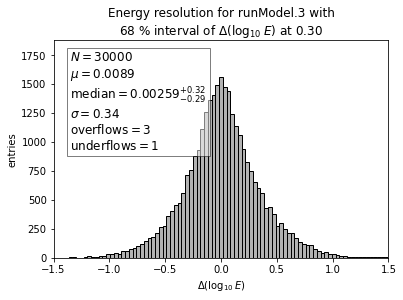

In [9]:
delta_log_E_string = r"$\Delta(\log_{10}\:E)$"
# fig, ax = php.get_histogram(predicted_nu_energy[:, 0], bins=np.arange(17, 20.1, 0.05), xlabel="predicted energy")
fig, ax = php.get_histogram(energy_difference_data, bins=np.linspace(-1.5, 1.5, 90),
                            xlabel=delta_log_E_string)
# ax.plot(xl, N*stats.rayleigh(scale=scale, loc=loc).pdf(xl))
plt.title(f"Energy resolution for {run_name} with\n68 % interval of {delta_log_E_string} at {energy_68:.2f}")
# fig.savefig(f"{plots_dir}/energy_resolution_{run_name}.png")

print(colored(f"Saved energy resolution for {run_name}!", "green", attrs=["bold"]))
print("")

In [52]:
#evaluate sigma:

In [ ]:
delta_sigma_string = r"$\Delta(\sigma)$"
sigma_difference = shower_energy_log10_sigma_predict - gauss_fit_sigma_list
fig, ax = php.get_histogram(sigma_difference, bins=100, xlabel=delta_sigma_string)

plt.title(f"sigma resolution for {run_name} with\n68 % interval of {delta_sigma_string}")
# fig.savefig(f"{plots_dir}/energy_resolution_{run_name}.png")

print(colored(f"Saved sigma resolution for {run_name}!", "green", attrs=["bold"]))
print("")

Text(0.5, 1.0, 'Energy uncertainty for runModel.3')

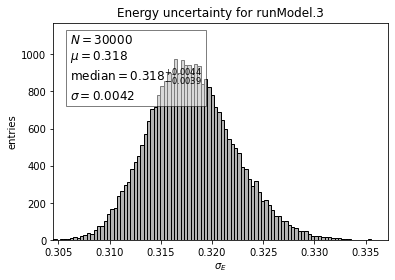

In [10]:
sigma_string = r"$\sigma_{E}$"
fig, ax = php.get_histogram(shower_energy_log10_sigma_predict, bins = 100, xlabel=sigma_string)
plt.title(f"Energy uncertainty for {run_name}")
# fig.savefig(f"{plots_dir}/energy__sigma_{run_name}.png")

In [11]:
true_log10_sigma = abs(energy_difference_data) 


In [12]:
delta_sigma_string = r"$\Delta(\sigma)$"
#sigma resolution
sigma_difference_data = np.array([ shower_energy_log10_sigma_predict[i] - true_log10_sigma[i] for i in range(len(true_log10_sigma))])

Saved sigma Normalised Gaussian for runModel.3!



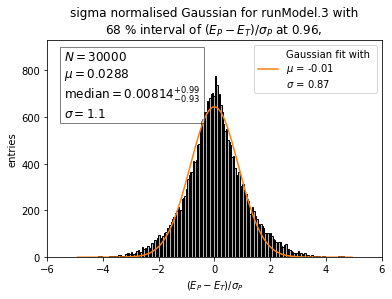

In [13]:
normal_sigma_string = r"$(E_P - E_T)/\sigma_P$"
#sigma resolution
sigma_ratio_data = np.array([ energy_difference_data[i]/shower_energy_log10_sigma_predict[i] for i in range(len(energy_difference_data))])
# Calculate 68 %
sigma_68 = calculate_percentage_interval(sigma_ratio_data, 0.68)

#fitting
def gauss_fit_plot(sigma_ratio_data, energysmallbin=''):   
    (count, bins) = np.histogram(sigma_ratio_data, bins=200)#np.linspace(-40, 40, 400)
                                 #bins=np.linspace(np.min(sigma_ratio_data)-0.1, np.max(sigma_ratio_data)+0.1, 100))

    bins_middle = (bins[:-1] + bins[1:])/2
    p0 = [1000, 0., 1.]
    def gauss(x, *p):
        A, mu, sigma = p
        return A*(2 * np.pi * sigma)**-0.5 * np.exp(-0.5 * (x - mu) ** 2 * sigma ** -2)
    coeff, var_matrix = curve_fit(gauss, bins_middle, count, p0=p0, maxfev=5000)
    hist_fit = gauss(bins_middle, *coeff)

    fig, ax = php.get_histogram(sigma_ratio_data, bins=200, xlabel=normal_sigma_string)
                                #bins=np.linspace(np.min(sigma_ratio_data)-0.1, np.max(sigma_ratio_data)+0.1, 100),

    ax.plot(bins_middle,hist_fit)
    ax.legend([f"Gaussian fit with \n$\mu$ = {coeff[1]:.2f}\n$\sigma$ = {coeff[2]:.2f}"], loc='upper right')
    plt.title(f"sigma normalised Gaussian for {run_name} with\n68 % interval of {normal_sigma_string} at {sigma_68:.2f}, {energysmallbin}")
    ax.set_xlim(-6, 6)
    fig.savefig(f"{plots_dir}/sigma_Normalised_Gaussian_{run_name} for {energysmallbin}.png")
    
    print(colored(f"Saved sigma Normalised Gaussian for {run_name}!", "green", attrs=["bold"]))
    print("")
gauss_fit_plot(sigma_ratio_data)

In [14]:
print("chi_sq = ",sum(sigma_ratio_data**2))

chi_sq =  33919.726660606175


In [15]:
def smallplots(index, index_source, smalltype, sigma = False):
    for i in range(len(index)):
#     print("\n",i)
        if i == 0:
            energy_range = shower_energy_log10[index_source < index[i]]
            energy_range_p = shower_energy_log10_predict[index_source < index[i]]
            sigma_range_p = shower_energy_log10_sigma_predict[index_source < index[i]]
            energysmallbin = f"{smalltype} < {index[i]}"
        elif i == range(len(index)) :
            energy_range = shower_energy_log10[index_source > index[i-1]]
            energy_range_p = shower_energy_log10_predict[index_source > index[i-1]]
            sigma_range_p = shower_energy_log10_sigma_predict[index_source > index[i-1]]
            energysmallbin = f"{smalltype} > {index[i-1]}"
        else:
            energy_range = shower_energy_log10[np.logical_and(index_source > index[i-1], index_source < index[i])]   
            energy_range_p = shower_energy_log10_predict[np.logical_and(index_source > index[i-1], index_source < index[i])]
            sigma_range_p = shower_energy_log10_sigma_predict[np.logical_and(index_source > index[i-1], index_source < index[i])]
            energysmallbin = f"{index[i-1]} < {smalltype} < {index[i]}"
        
        normal_sigma_string = r"$(E_P - E_T)/\sigma_P$"
        #sigma resolution
        energy_difference_data_small = energy_range_p - energy_range
        sigma_ratio_data = np.array([ energy_difference_data_small[i]/sigma_range_p[i] for i in range(len(energy_difference_data_small))])
        # Calculate 68 %
        sigma_68 = calculate_percentage_interval(sigma_ratio_data, 0.68)
            
        if sigma:
            fig, ax = php.get_histogram(sigma_range_p, bins = 100, xlabel=sigma_string)
#             ax.set_xlim(0,0.7)
            plt.title(f"Energy uncertainty for {run_name} {energysmallbin}")
            fig.savefig(f"{plots_dir}/energy__sigma_{run_name}_{energysmallbin}.png")
        else:
            gauss_fit_plot(sigma_ratio_data, energysmallbin)


Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!



/tmp/ipykernel_61118/401930198.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return A*(2 * np.pi * sigma)**-0.5 * np.exp(-0.5 * (x - mu) ** 2 * sigma ** -2)


Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!



/tmp/ipykernel_61118/401930198.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return A*(2 * np.pi * sigma)**-0.5 * np.exp(-0.5 * (x - mu) ** 2 * sigma ** -2)


Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!



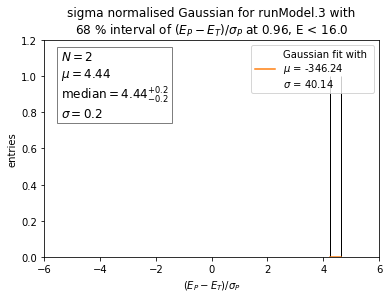

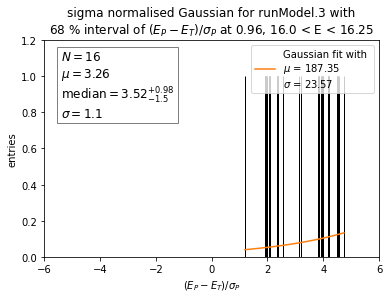

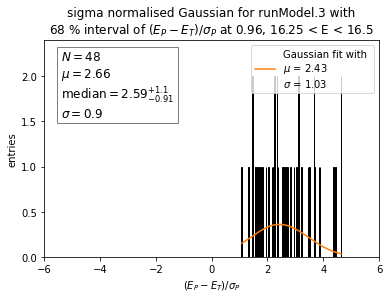

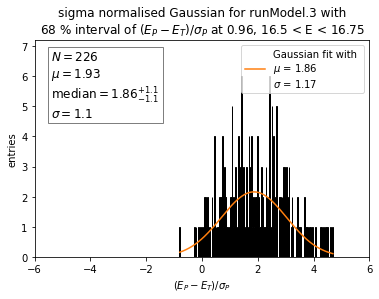

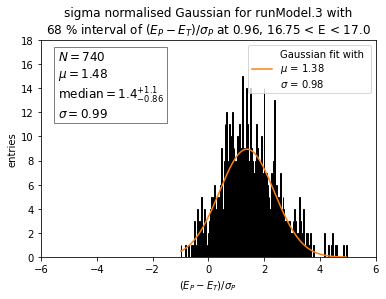

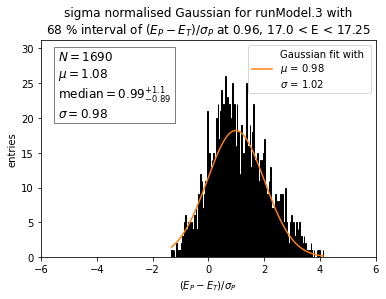

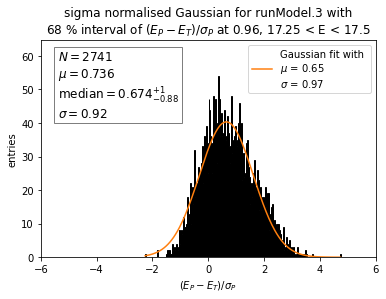

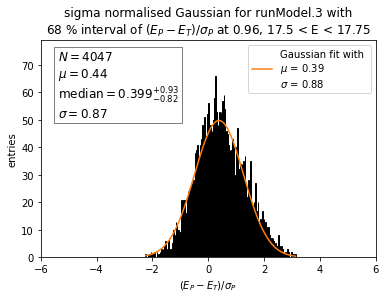

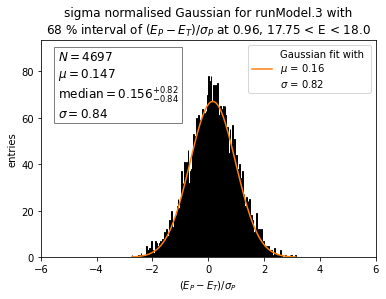

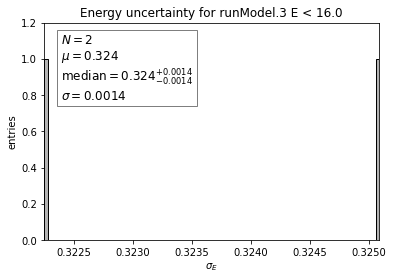

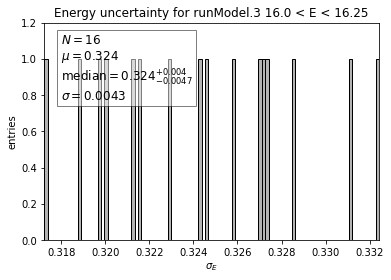

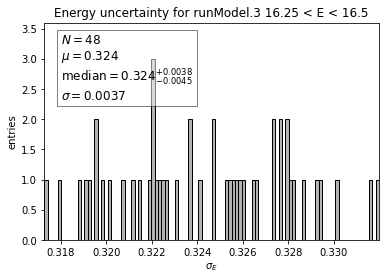

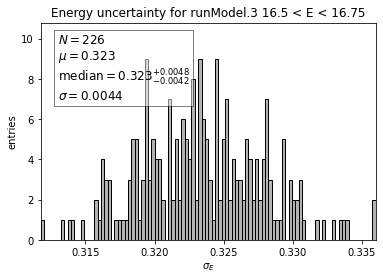

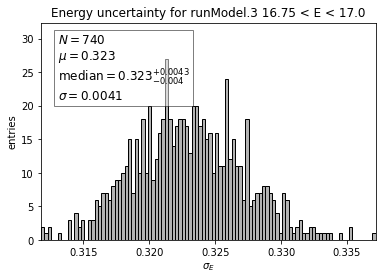

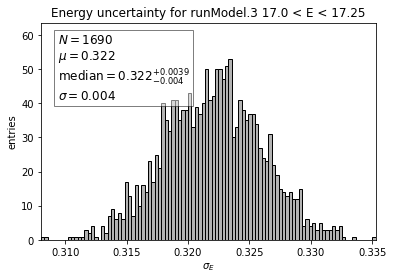

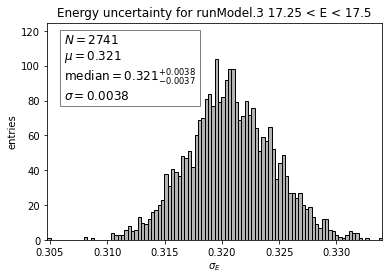

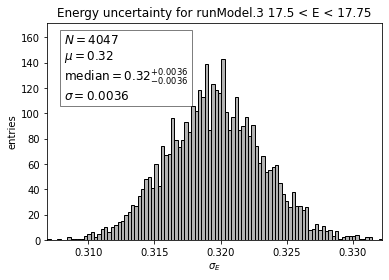

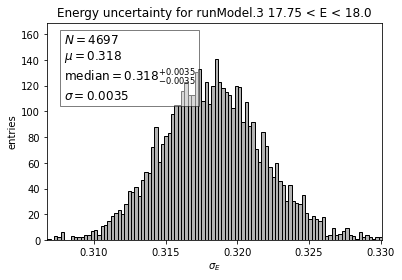

In [18]:
energy_index = np.linspace(np.ceil(np.min(shower_energy_log10)),np.floor(np.max(shower_energy_log10)),9)     #16,19       
smallplots(energy_index, shower_energy_log10, smalltype='E')
smallplots(energy_index, shower_energy_log10,smalltype='E', sigma =True)

In [19]:
## vs SNR

# Load test file data and make predictions
    # Load first file
data, nu_direction, nu_zenith, nu_azimuth, nu_energy, nu_flavor, shower_energy = load_file_all_properties(test_file_ids[0])
    # Then load rest of files
if len(test_file_ids) > 1:
    for test_file_id in test_file_ids:
        if test_file_id != test_file_ids[0]:
            data_tmp, nu_direction_tmp, nu_zenith_tmp, nu_azimuth_tmp, nu_energy_tmp, nu_flavor_tmp, shower_energy_tmp = load_file_all_properties(test_file_id)

            data = np.concatenate((data, data_tmp))

from constants import test_data_points
data = data[0:test_data_points]


loading file 38
/mnt/md0/data/SouthPole/single_surface_4LPDA_PA_15m_RNOG_fullsim.json/ARZ2020_emhad_noise.yaml/G03generate_events_full_surface_sim/LPDA_2of4_100Hz/4LPDA_1dipole_fullband/em_had_separately/ data_had_emhad_1-3_had_1_LPDA_2of4_100Hz_4LPDA_1dipole_fullband_
finished loading file 38 in 13.165196418762207s
loading file 39
/mnt/md0/data/SouthPole/single_surface_4LPDA_PA_15m_RNOG_fullsim.json/ARZ2020_emhad_noise.yaml/G03generate_events_full_surface_sim/LPDA_2of4_100Hz/4LPDA_1dipole_fullband/em_had_separately/ data_had_emhad_1-3_had_1_LPDA_2of4_100Hz_4LPDA_1dipole_fullband_
finished loading file 39 in 12.897059202194214s
loading file 40
/mnt/md0/data/SouthPole/single_surface_4LPDA_PA_15m_RNOG_fullsim.json/ARZ2020_emhad_noise.yaml/G03generate_events_full_surface_sim/LPDA_2of4_100Hz/4LPDA_1dipole_fullband/em_had_separately/ data_had_emhad_1-3_had_1_LPDA_2of4_100Hz_4LPDA_1dipole_fullband_
finished loading file 40 in 12.915980339050293s


Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!

Saved sigma Normalised Gaussian for runModel.3!



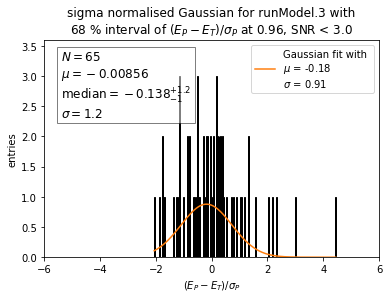

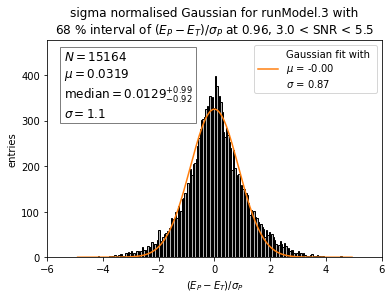

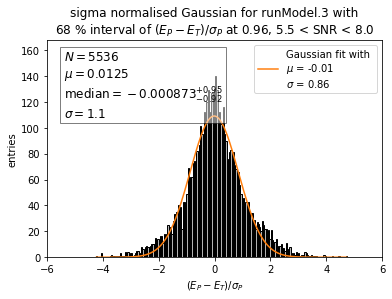

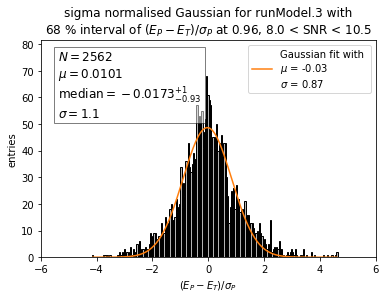

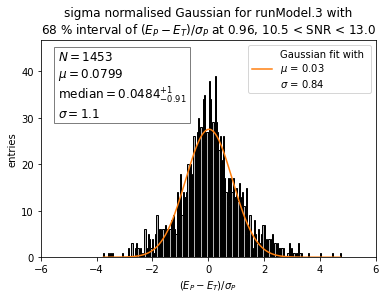

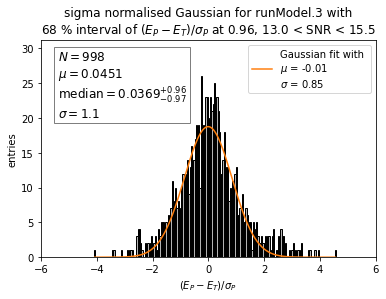

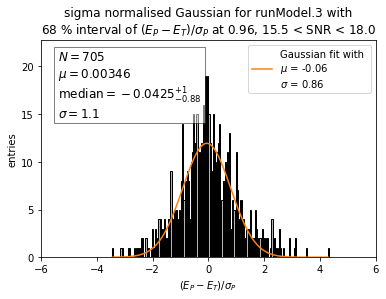

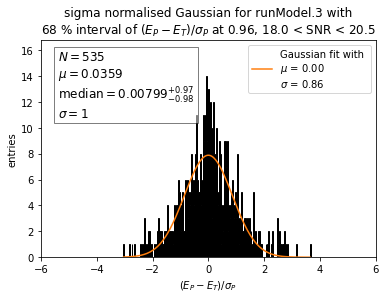

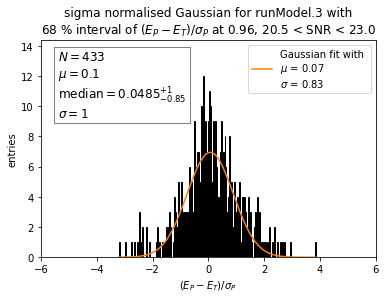

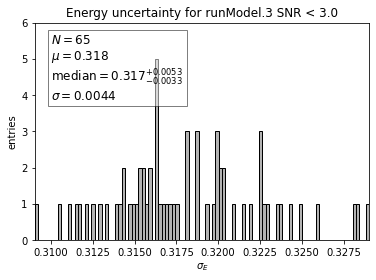

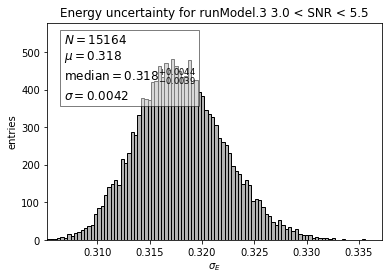

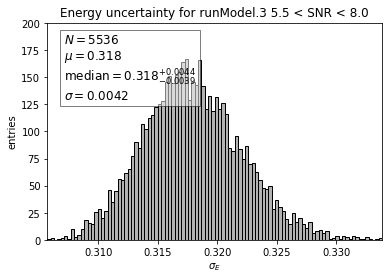

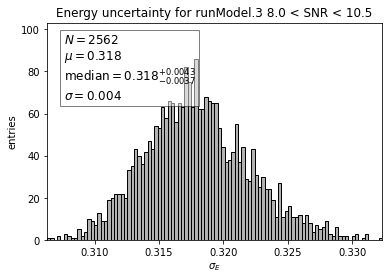

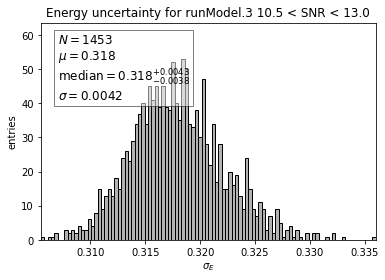

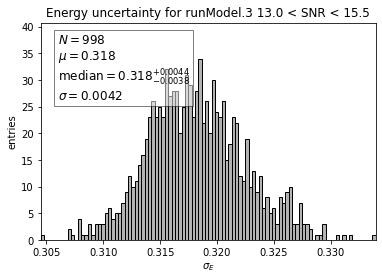

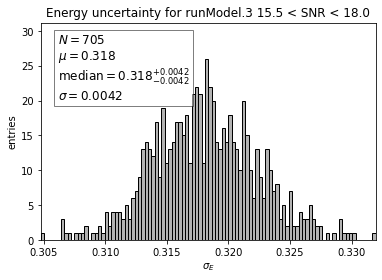

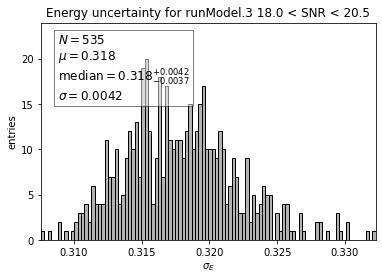

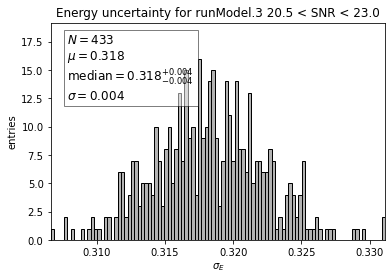

In [24]:
max_LPDA = np.max(np.max(np.abs(data[:, 0:4, :]), axis=1), axis=1)
SNR_x = max_LPDA[:, 0] / 10.
SNR_index = np.linspace(np.ceil(np.min(SNR_x)),23,9)

smallplots(SNR_index, SNR_x, smalltype='SNR')
smallplots(SNR_index, SNR_x, smalltype='SNR', sigma =True)

In [64]:
max_LPDA.shape

(10000, 1)

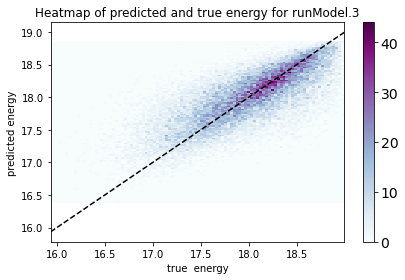

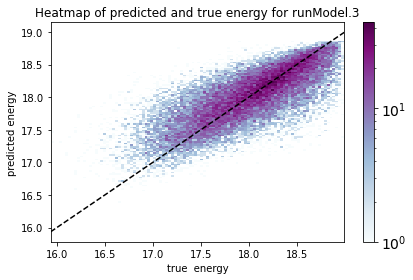

In [21]:
#Heat map for energy
#####################
plot_title = f"Heatmap of predicted and true energy for {run_name}"
xlabel = f"true  energy"
ylabel = f"predicted energy"
cmap = "BuPu"
bins = 100

for cscale in ["linear", "log"]:
    file_name = f"plots/scatter_2dhistogram_{run_name}_cscale{cscale}.png"
    
    # Also plot a heatmap of the scatter plot instead of just dots
    fig, ax, im = get_histogram2d(shower_energy_log10, shower_energy_log10_predict, fname=file_name, 
                                  title=plot_title, xlabel=xlabel, ylabel=ylabel, bins=bins, 
                                  cmap=cmap, cscale=cscale)

    # Plot a black line through the middle
    xmin = min(shower_energy_log10)
    xmax = max(shower_energy_log10)
    ymin = min(shower_energy_log10_predict)
    ymax = max(shower_energy_log10_predict)

    ax.plot([min(xmin, ymin), max(xmax, ymax)], [min(xmin, ymin), max(xmax, ymax)], 'k--')

    plt.tight_layout()
    plt.savefig(f"{plots_dir}/predicted_energy_vs_true_energy_{cscale}_{run_name}.png", dpi=300)

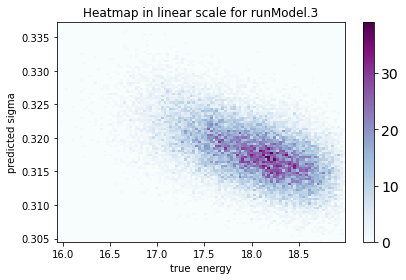

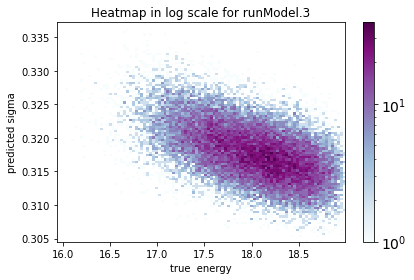

In [22]:
#Heat map for sigma 1
#####################
xlabel = f"true  energy"
ylabel = f"predicted sigma"
cmap = "BuPu"
bins = 100

for cscale in ["linear", "log"]:
    file_name = f"plots/scatter_2dhistogram_{run_name}_cscale{cscale}.png"
    plot_title = f"Heatmap in {cscale} scale for {run_name}"
    # Also plot a heatmap of the scatter plot instead of just dots
    fig, ax, im = get_histogram2d(shower_energy_log10, shower_energy_log10_sigma_predict, fname=file_name, 
                                  title=plot_title, xlabel=xlabel, ylabel=ylabel, bins=bins, 
                                  cmap=cmap, cscale=cscale)

    # Plot a black line through the middle
    xmin = min(shower_energy_log10)
    xmax = max(shower_energy_log10)
    ymin = min(shower_energy_log10_sigma_predict)
    ymax = max(shower_energy_log10_sigma_predict)

    # ax.plot([min(xmin, ymin), max(xmax, ymax)], [min(xmin, ymin), max(xmax, ymax)], 'k--')

    plt.tight_layout()
    plt.savefig(f"{plots_dir}/predicted_sigma_vs_true_energy_{cscale}_{run_name}.png", dpi=300)

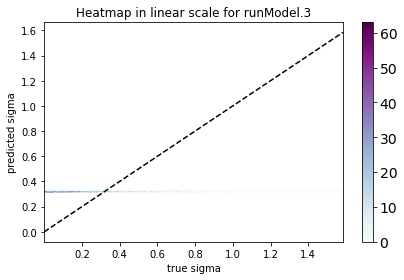

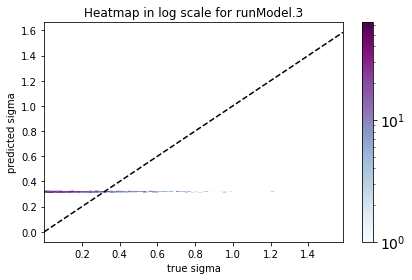

In [23]:
#Heat map for sigma 2
#####################
xlabel = f"true sigma"
ylabel = f"predicted sigma"
cmap = "BuPu"
bins = 100

for cscale in ["linear", "log"]:
    file_name = f"plots/scatter_2dhistogram_{run_name}_cscale{cscale}.png"
    plot_title = f"Heatmap in {cscale} scale for {run_name}"
    # Also plot a heatmap of the scatter plot instead of just dots
    fig, ax, im = get_histogram2d(true_log10_sigma, shower_energy_log10_sigma_predict, fname=file_name, 
                                  title=plot_title, xlabel=xlabel, ylabel=ylabel, bins=bins, 
                                  cmap=cmap, cscale=cscale)

    # Plot a black line through the middle
    xmin = min(true_log10_sigma)
    xmax = max(true_log10_sigma)
    ymin = min(shower_energy_log10_sigma_predict)
    ymax = max(shower_energy_log10_sigma_predict)

    ax.plot([min(xmin, ymin), max(xmax, ymax)], [min(xmin, ymin), max(xmax, ymax)], 'k--')

    plt.tight_layout()
    plt.savefig(f"{plots_dir}/sigma_Normalised_Gaussian_{cscale}_{run_name}.png", dpi=300)

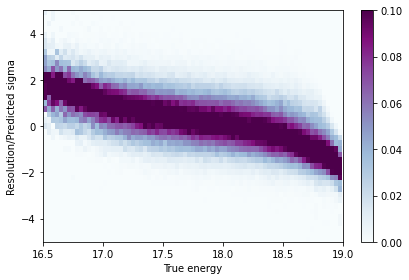

In [27]:
#New Heat map for Resol/sigma
binxy = 100
cmap = "BuPu" #"gist_stern"
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111)
get_2dhist_normalized_columns(shower_energy_log10, energy_difference_data/shower_energy_log10_sigma_predict, fig, ax, binsx=binxy, binsy=binxy, cmap = cmap, clim=(0, 0.1))
ax.set_xlim(16.5,19)       
ax.set_ylim(-5, 5)
# ax.set_title(f"Heatmap for {run_name}")
ax.set_xlabel("True energy")
ax.set_ylabel("Resolution/Predicted sigma")

fig.tight_layout()
fig.savefig(f"{plots_dir}/scatter_2dhistogram_{run_name}_Resol_sigma.png")